DBSCAN - Density Based Spatial Clustering of Application with noice

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
X = df.iloc[:, [3, 4]].values  # Assuming the last two columns are the features for clustering

In [9]:
X = StandardScaler().fit_transform(X)

- eps - Neighbourhood radius : How close two points must be to be in the same cluster
- min_sample - Minimum points in a cluster : The minimum number of points needed to form a cluster

In [10]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

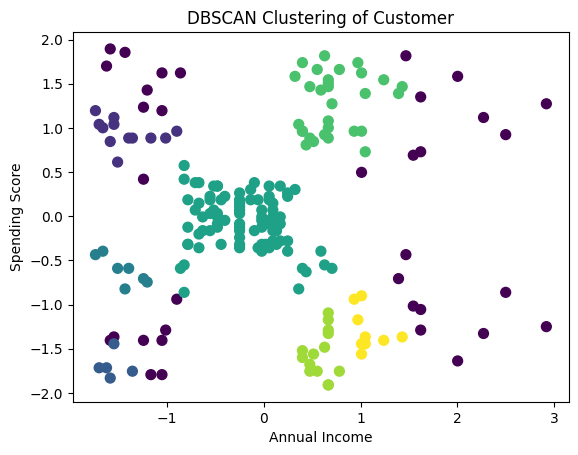

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering of Customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()